In [3]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# 2. Load the Dataset
url = "C:\\Users\\User\\Downloads\\CarPrice_Assignment.csv"
df = pd.read_csv(url)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# 3. Initial Exploration
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())

(205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    

In [9]:
# 4. Preprocessing

if 'car_ID' in df.columns:
    df.drop('car_ID', axis=1, inplace=True)

In [11]:
df = pd.get_dummies(df, drop_first=True)

In [13]:
X = df.drop('price', axis=1)
y = df['price']

In [15]:

# 6. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# 7. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
# 8. Train Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "R2 Score": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred)
    })

In [22]:
# 9. Display Results
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
                      Model      R2 Score           MSE           MAE
0         Linear Regression -2.502365e+25  1.975467e+33  3.022257e+16
1             Decision Tree  8.558977e-01  1.137602e+07  2.200142e+03
2             Random Forest  9.533492e-01  3.682803e+06  1.367316e+03
3         Gradient Boosting  9.307984e-01  5.463056e+06  1.696863e+03
4  Support Vector Regressor -1.020658e-01  8.700151e+07  5.707013e+03


In [24]:
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

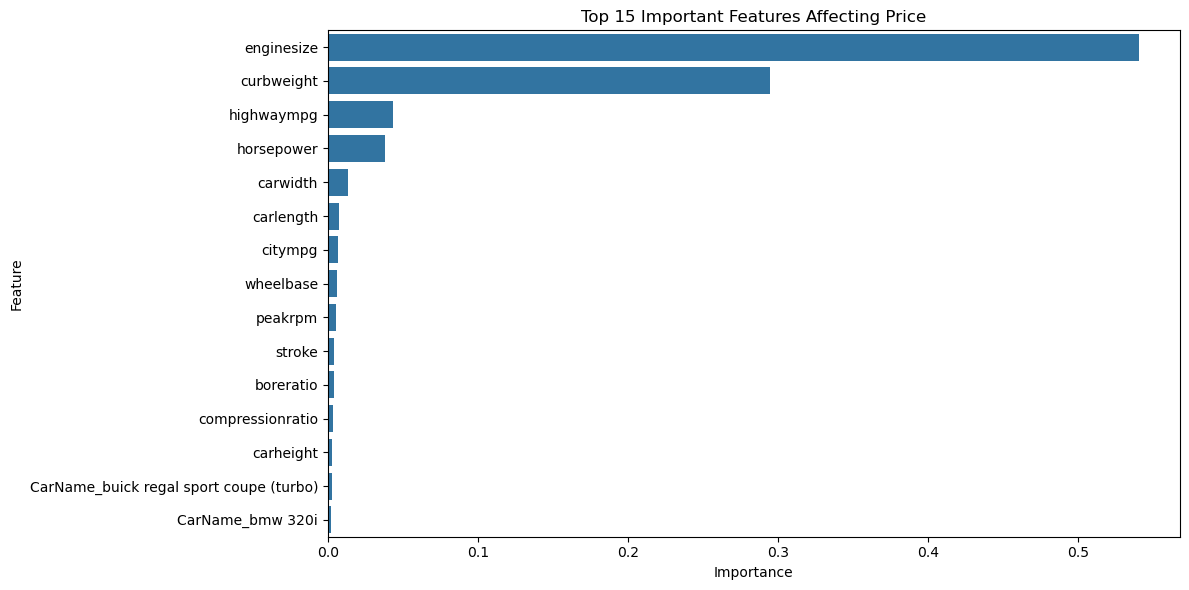

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x="Importance", y="Feature", data=feature_df.head(15))
plt.title("Top 15 Important Features Affecting Price")
plt.tight_layout()
plt.show()

In [38]:
# 11. Hyperparameter Tuning
print("Starting Grid Search...")
grid_search.fit(X_train, y_train)
print("Grid Search Complete.")


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("\nTuned Random Forest Performance:")
print("R2:", r2_score(y_test, y_pred_best))
print("MSE:", mean_squared_error(y_test, y_pred_best))
print("MAE:", mean_absolute_error(y_test, y_pred_best))

Starting Grid Search...
Grid Search Complete.

Tuned Random Forest Performance:
R2: 0.9556802685235559
MSE: 3498777.8070572186
MAE: 1331.434209613852
